In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
img = cv2.imread('/content/testimg.jpeg')

In [37]:
type(img)

numpy.ndarray

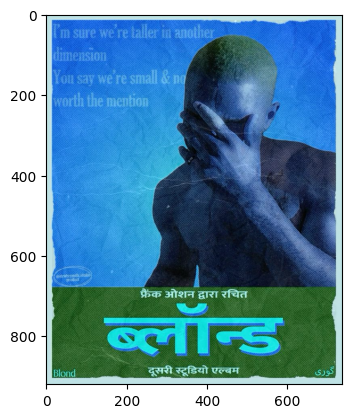

In [38]:
plt.imshow(img)

In [39]:
img.shape

(920, 736, 3)

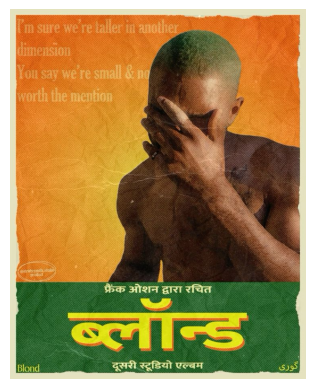

In [40]:
# Convert BGR to RGB
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [41]:
# Image Size
h, w, c = img.shape
print(f"Image Size: {w}x{h}, Channels: {c}")

# Total Pixels
total_pixels = h * w
print(f"Total Pixels: {total_pixels}")

Image Size: 736x920, Channels: 3
Total Pixels: 677120


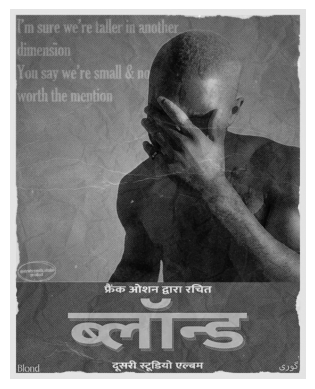

In [42]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

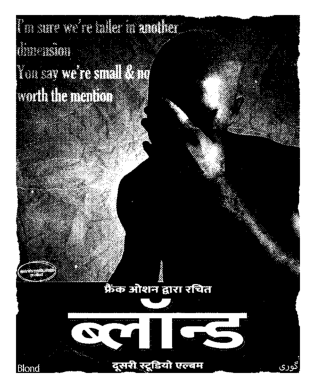

Area of Black Pixels: 504666


In [43]:
threshold_value = 128
_, image_binary = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.show()
black_pixel_count = cv2.countNonZero(255 - image_binary)  # black pixels
print(f'Area of Black Pixels: {black_pixel_count}')

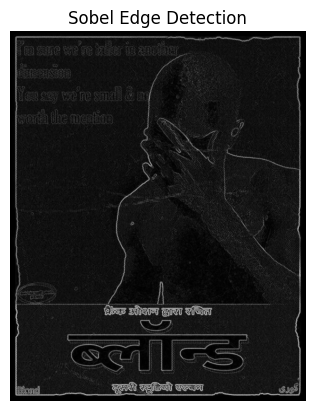

In [44]:
# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Display Sobel Edge Detection result
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


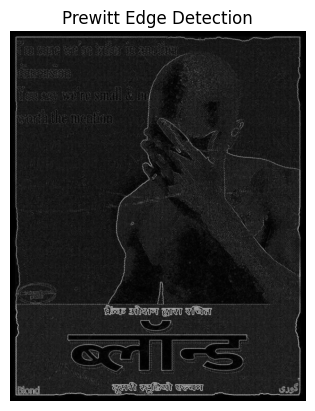

In [45]:
# Prewitt Operator Kernel
prewitt_kernel_x = np.array([[1, 0, -1],
                              [1, 0, -1],
                              [1, 0, -1]])

prewitt_kernel_y = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])

# Apply Prewitt operator
prewitt_x = cv2.filter2D(gray_img, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(gray_img, cv2.CV_64F, prewitt_kernel_y)
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)

# Display Prewitt Edge Detection result
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()


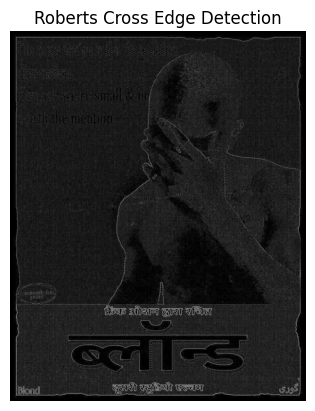

In [46]:
# Roberts Cross Operator Kernel
roberts_kernel_x = np.array([[1, 0],
                              [0, -1]])

roberts_kernel_y = np.array([[0, 1],
                              [-1, 0]])

# Apply Roberts operator
roberts_x = cv2.filter2D(gray_img, cv2.CV_64F, roberts_kernel_x)
roberts_y = cv2.filter2D(gray_img, cv2.CV_64F, roberts_kernel_y)
roberts_combined = cv2.magnitude(roberts_x, roberts_y)

# Display Roberts Edge Detection result
plt.imshow(roberts_combined, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')
plt.show()


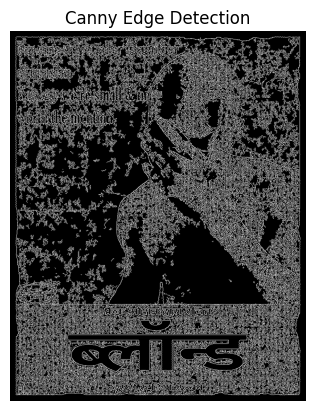

In [47]:
# Canny Edge Detection
canny_edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)

# Display Canny Edge Detection result
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

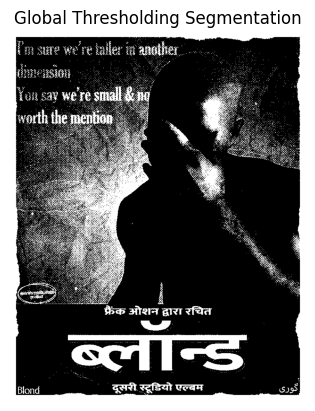

In [48]:
# Global Thresholding
_, global_thresh = cv2.threshold(gray_img, thresh=128, maxval=255, type=cv2.THRESH_BINARY)

# Display Global Thresholding result
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding Segmentation')
plt.axis('off')
plt.show()


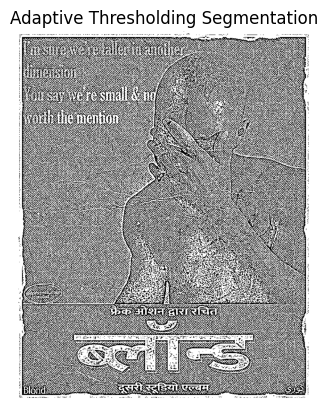

In [49]:
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_img,
                                         maxValue=255,
                                         adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         thresholdType=cv2.THRESH_BINARY,
                                         blockSize=11,
                                         C=2)

# Display Adaptive Thresholding result
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding Segmentation')
plt.axis('off')
plt.show()

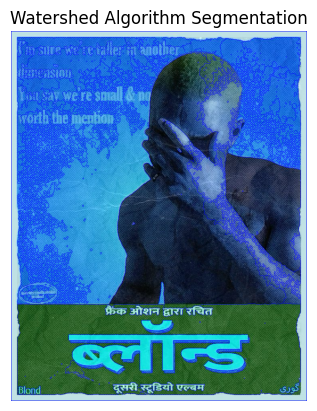

In [50]:
# Watershed Algorithm for Region-Based Segmentation
ret, markers = cv2.connectedComponents(global_thresh.astype(np.uint8))

# watershed algorithm
markers = markers + 1
markers[global_thresh == 0] = 0  # Mark background with zero

#  watershed algorithm on original image (BGR)
image_watershed = image.copy()
markers = cv2.watershed(image_watershed, markers)
image_watershed[markers == -1] = [255, 0, 0]  #  boundaries in red

# Watershed Segmentation result
plt.imshow(cv2.cvtColor(image_watershed, cv2.COLOR_BGR2RGB))
plt.title('Watershed Algorithm Segmentation')
plt.axis('off')
plt.show()
